## Dataset Analysis

### Step 1: Importing all the necessary Libraries

In [2]:
# Import necessary libraries

# numpy for working with arrays
import numpy as np

# pandas for data manipulation
import pandas as pd

# For the bar chart visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# For the map visualization
import folium

# For chart visualizations
import seaborn as sns

# To ignore any warnings that may be generated by Matplotlib
import warnings
warnings.filterwarnings("ignore")

# sqlite3 for storage of the dataset
import sqlite3
from contextlib import closing
from ast import literal_eval

# For working with file paths.
from os import path

# For opening, manipulating, and saving many different image file formats.
from PIL import Image

# For creating word clouds.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

During some trial and error I found that my analysis performs better when I import the data as json files. So instead of connecting directly to the sql database, I'm using tables exported from the database in json format.

In [4]:
# Setup SQLite Database to store data (see above note)
database = 'Book_DB.db'
conn = sqlite3.connect(database)
c = conn.cursor()

Link to Tableau worksheets: [Book_Censorship](https://public.tableau.com/views/Book_Censorship/BansbyState?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

In [ ]:
# Import table from sql database as dataframe
# query = 'SELECT * FROM all_books'
# df = pd.read_sql(sql=query, con=conn)

# Preview dataframe
# df.head()

In [3]:
# Import table saved from sql database as dataframe
df = pd.read_json(r'json_tables\ala_top_10_archive_clean.json')

In [8]:
# Review data
df.head()

,author,reasons,title,year
0,Maia Kobabe,"LGBTQIA content, claimed to be sexually explicit",Gender Queer A Memoir,2023
1,George M. Johnson,"LGBTQIA content, claimed to be sexually explicit",All Boys Arent Blue A Memoir-Manifesto,2023
2,Juno Dawson,"LGBTQIA content, sex education, claimed to be ...",This Book is Gay,2023
3,Stephen Chbosky,"claimed to be sexually explicit, LGBTQIA conte...",The Perks of Being a Wallflower,2023
4,Mike Curato,"LGBTQIA content, claimed to be sexually explicit",Flamer,2023


In [10]:
# Practicing code to review some basic info on dataset
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} titles in this dataset such as {}... \n".format(len(df.title.unique()),
                                                                           ", ".join(df.title.unique()[0:5])))

print("There are {} authors represented in this dataset such as {}... \n".format(len(df.author.unique()),
                                                                                      ", ".join(df.author.unique()[0:5])))

There are 234 observations and 4 features in this dataset. 

There are 105 titles in this dataset such as Gender Queer A Memoir, All Boys Arent Blue A Memoir-Manifesto, This Book is Gay, The Perks of Being a Wallflower, Flamer... 

There are 106 authors represented in this dataset such as Maia Kobabe, George M. Johnson, Juno Dawson, Stephen Chbosky, Mike Curato... 



In [11]:
# Groupby by year
year = df.groupby("year")

# Summary statistic of all years
year.describe().head()

author                                      reasons         \
      count unique                      top freq   count unique   
year                                                              
2001     10     10             J.K. Rowling    1      10      9   
2002     10     10             J.K. Rowling    1      10      8   
2003     10     10  Phyllis Reynolds Naylor    1      10     10   
2004     10     10           Robert Cormier    1      10      9   
2005     10      9          Robie H. Harris    2      10     10   

                                                             title         \
                                                    top freq count unique   
year                                                                        
2001           sexually explicit, unsuited to age group    2    10     10   
2002                                 offensive language    3    10     10   
2003  sexual content, offensive language, unsuited t...    1    10     10   
2004               offensive language, racism, violence    2    10     10   
2005  abortion, homosexuality, nudity, religious vie...    1    10     10   

                                                              
                                                    top freq  
year                                                          
2001                        Harry Potter Series Box Set    1  
2002                        Harry Potter Series Box Set    1  
2003                                 The Agony of Alice    1  
2004                                  The Chocolate War    1  
2005  Its Perfectly Normal Changing Bodies, Growing ...    1

In [17]:
# Combine text in reasons column
# Print total # of words
text = " ".join(reason for reason in df.reasons)
print ("There are {} words in the combination of all reasons.".format(len(text)))


There are 14231 words in the combination of all reasons.


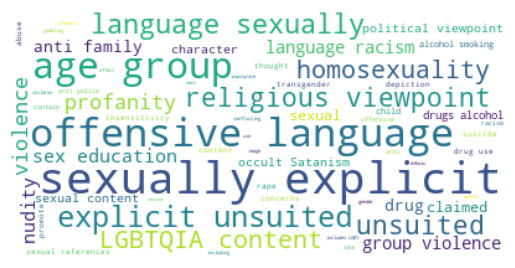

In [16]:
# Create a stopword list to keep common word out of wordcloud
stopwords = set(STOPWORDS)
stopwords.update(["to", "be", "of", "and", "a", "for", "it", "is", "was", "additional", "reasons"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
# Open a png file to use as a mask
book_mask = np.array(Image.open("reader.png"))
book_mask

array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

In [23]:
# Function to transform pixel values in an image
def transform_format(val):
    if val.all() == 0:
        return 255
    else:
        return val

In [24]:
# If needed, transform mask into a new one that will work with the function:
transformed_book_mask = np.ndarray((book_mask.shape[0],book_mask.shape[1]), np.int32)

for i in range(len(book_mask)):
    transformed_book_mask[i] = list(map(transform_format, book_mask[i]))

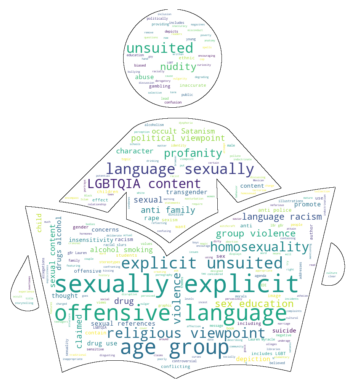

<Figure size 640x480 with 0 Axes>

In [73]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

wc = WordCloud(background_color="white", max_words=2000, mask=book_mask,
               stopwords=stopwords, contour_width=0.5, contour_color='black')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file("book_reader.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

Index(['year'], dtype='object')
Index(['author', 'reasons', 'title'], dtype='object')


In [85]:
# Import table saved from sql database as dataframe
df = pd.read_json(r'banned_book_data\all_books.json')
df.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,,,https://www.goodreads.com/work/editions/15036678,9780375424,9780375424144,"September 1, 2011",...,Craig Thompson,672,"[Graphic Novels, Comics, Fiction, Graphic Nove...","{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...","42,085","3,976",4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9781612130293,"May 25, 2011",...,E.L. James,356,"[Romance, Fiction, Erotica, BDSM, Adult, Conte...","{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...","2,659,011","84,832",3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,,,https://www.goodreads.com/work/editions/1639903,9780743454,9780743454537,"April 6, 2004",...,Jodi Picoult,423,"[Fiction, Chick Lit, Young Adult, Drama, Adult...","{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...","1,231,031","38,093",4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,"July 11, 2011",...,Jaycee Dugard,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...","126,111","10,174",3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9781451629187,"July 11, 2011",...,Jaycee Dugard,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...","126,102","10,174",3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...


In [86]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['book_id_title', 'book_id', 'num_pages', 'average_rating'], dtype='object')
Index(['cover_image_uri', 'book_title', 'book_series', 'book_series_uri',
       'top_5_other_editions', 'isbn', 'isbn13', 'year_first_published',
       'authorlink', 'author', 'genres', 'shelves', 'lists', 'num_ratings',
       'num_reviews', 'rating_distribution', 'reviews_page'],
      dtype='object')


In [87]:
# Remove commas from values before conversion to avoid NaN
df['num_reviews'] = df['num_reviews'].replace(',', '', regex=True)
df['num_ratings'] = df['num_ratings'].replace(',', '', regex=True)

In [88]:
# Convert values to numberical
df['year_first_published'] = pd.to_datetime(df['year_first_published'], format='%B %d, %Y', errors='coerce')
df['isbn13'] = pd.to_numeric(df['isbn13'], errors='coerce')
df['num_ratings'] = pd.to_numeric(df['num_ratings'], errors='coerce')
df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')
df.head()

,book_id_title,book_id,cover_image_uri,book_title,book_series,book_series_uri,top_5_other_editions,isbn,isbn13,year_first_published,...,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution,reviews_page
0,10138607,10138607,https://images-na.ssl-images-amazon.com/images...,Habibi,,,https://www.goodreads.com/work/editions/15036678,9780375424,9.780375e+12,2011-09-01,...,Craig Thompson,672,"[Graphic Novels, Comics, Fiction, Graphic Nove...","{'to-read': 48146, 'graphic-novels': 2455, 'gr...","{'Best Graphic Novels': [38, 3359], 'Required ...",42085,3976,4.03,"{'5 Stars': 1544, '4 Stars': 2490, '3 Stars': ...",https://www.goodreads.com/book/show/10138607/r...
1,10818853,10818853,https://images-na.ssl-images-amazon.com/images...,Fifty Shades of Grey,Fifty Shades,https://www.goodreads.com/series/63134-fifty-s...,https://www.goodreads.com/work/editions/15732562,9781612130,9.781612e+12,2011-05-25,...,E.L. James,356,"[Romance, Fiction, Erotica, BDSM, Adult, Conte...","{'to-read': 715974, 'currently-reading': 51995...","{'Best Book Boyfriends': [2, 10180], 'Best M/F...",2659011,84832,3.66,"{'5 Stars': 295769, '4 Stars': 276111, '3 Star...",https://www.goodreads.com/book/show/10818853/r...
2,10917,10917,https://images-na.ssl-images-amazon.com/images...,My Sister’s Keeper,,,https://www.goodreads.com/work/editions/1639903,9780743454,9.780743e+12,2004-04-06,...,Jodi Picoult,423,"[Fiction, Chick Lit, Young Adult, Drama, Adult...","{'to-read': 335130, 'currently-reading': 8931,...","{'Best Books Ever': [83, 122775], 'Best Books ...",1231031,38093,4.10,"{'5 Stars': 21917, '4 Stars': 53698, '3 Stars'...",https://www.goodreads.com/book/show/10917/revi...
3,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9.781452e+12,2011-07-11,...,Jaycee Dugard,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111068, 'currently-reading': 4090,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126111,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...
4,11330361,11330361,https://images-na.ssl-images-amazon.com/images...,A Stolen Life,Jaycee Dugard,https://www.goodreads.com/series/368303-jaycee...,https://www.goodreads.com/work/editions/16258764,9781451629,9.781452e+12,2011-07-11,...,Jaycee Dugard,273,"[Nonfiction, Memoir, True Crime, Biography, Au...","{'to-read': 111062, 'currently-reading': 4094,...","{'Kidnapped!': [21, 773], 'Books That Everyone...",126102,10174,3.95,"{'5 Stars': 2011, '4 Stars': 6657, '3 Stars': ...",https://www.goodreads.com/book/show/11330361/r...


In [89]:
# Apply series to shelves column
shelves = df['shelves'].apply(pd.Series)
shelves

,to-read,graphic-novels,graphic-novel,comics,currently-reading,favorites,fiction,comics-graphic-novels,graphic-novels-comics,graphic,...,crime-thriller,conspiracy,suspense-thriller,detective,mystery-crime,thriller-suspense,brown-dan,france,john-green,boarding-school
0,48146.0,2455.0,1135.0,1132.0,636.0,526.0,505.0,172.0,156.0,155.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,715974.0,NaN,NaN,NaN,51995.0,6045.0,4411.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335130.0,NaN,NaN,NaN,8931.0,4775.0,6828.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111068.0,NaN,NaN,NaN,4090.0,237.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111062.0,NaN,NaN,NaN,4094.0,237.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,6526.0,18.0,11.0,12.0,41.0,98.0,152.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,141765.0,5800.0,3589.0,1886.0,2540.0,2100.0,545.0,403.0,366.0,467.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,5912.0,NaN,NaN,NaN,90.0,105.0,88.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,540941.0,NaN,NaN,NaN,23689.0,7914.0,19412.0,NaN,NaN,NaN,...,320.0,311.0,298.0,288.0,263.0,257.0,242.0,237.0,NaN,NaN


In [90]:
# Fill NaN values, isolate columns for analysis
shelves = shelves.fillna(0)
shelves = shelves[['to-read',	'currently-reading']]

# Isolate columns from original dataframe for analysis
df1 = df[['book_title', 'author', 'num_pages', 'num_ratings', 'num_reviews', 'average_rating']]

In [91]:
# Concat dataframes
df2 = pd.concat([df1, shelves], axis=1)
df2.head()

,book_title,author,num_pages,num_ratings,num_reviews,average_rating,to-read,currently-reading
0,Habibi,Craig Thompson,672,42085,3976,4.03,48146.0,636.0
1,Fifty Shades of Grey,E.L. James,356,2659011,84832,3.66,715974.0,51995.0
2,My Sister’s Keeper,Jodi Picoult,423,1231031,38093,4.10,335130.0,8931.0
3,A Stolen Life,Jaycee Dugard,273,126111,10174,3.95,111068.0,4090.0
4,A Stolen Life,Jaycee Dugard,273,126102,10174,3.95,111062.0,4094.0


In [93]:
# removing duplicates
df2['book_title'] = df2['book_title'].drop_duplicates()

# removing empty rows
df2=df2.dropna()
cols = ['to-read', 'currently-reading']
df2[cols] = df2[cols].applymap(np.int64)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 140
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_title         129 non-null    object 
 1   author             129 non-null    object 
 2   num_pages          129 non-null    int64  
 3   num_ratings        129 non-null    int64  
 4   num_reviews        129 non-null    int64  
 5   average_rating     129 non-null    float64
 6   to-read            129 non-null    int64  
 7   currently-reading  129 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 9.1+ KB


In [94]:
df2.describe()

,num_pages,num_ratings,num_reviews,average_rating,to-read,currently-reading
count,129.000000,1.290000e+02,129.000000,129.000000,1.290000e+02,129.000000
mean,300.930233,9.916565e+05,28441.356589,4.032093,3.411434e+05,19087.837209
std,240.164013,1.745718e+06,41558.098640,0.304384,5.103860e+05,36293.764924
min,32.000000,9.500000e+01,24.000000,2.840000,1.560000e+02,0.000000
25%,182.000000,1.121700e+04,1403.000000,3.830000,6.526000e+03,160.000000
50%,256.000000,1.261460e+05,8269.000000,4.030000,8.210100e+04,2540.000000
75%,325.000000,1.228663e+06,41855.000000,4.230000,5.409410e+05,21974.000000
max,1590.000000,1.027902e+07,223337.000000,4.650000,2.450255e+06,228988.000000


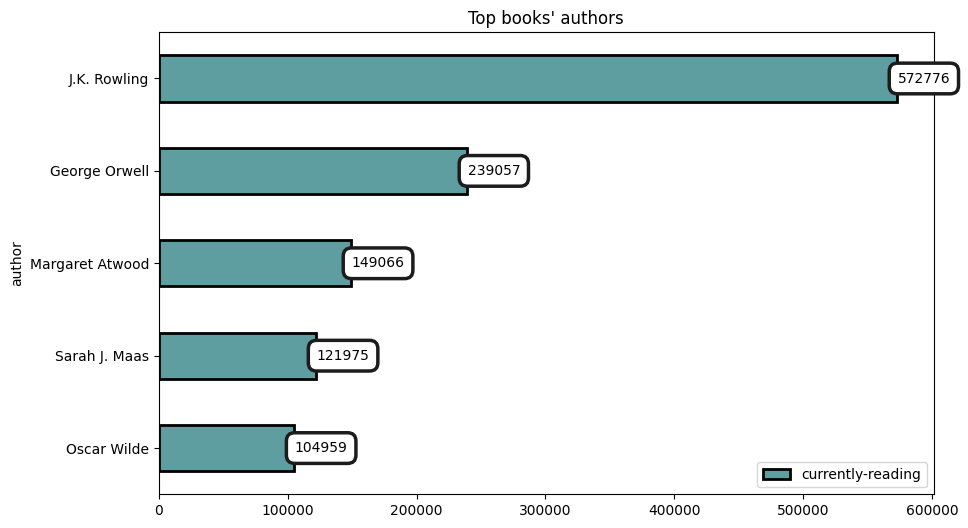

In [101]:
# Obtain top book authors based on currently-reading value
topauthors=pd.pivot_table(df2,index='author',values='currently-reading',aggfunc='sum')
topauthors=topauthors.sort_values(by='currently-reading',ascending=False).head()
topauthors=topauthors.sort_values(by='currently-reading',ascending=True)
p1=topauthors.plot(kind='barh',figsize=(10,6),title="Top books' authors",color = 'cadetblue', edgecolor = 'black',lw=2)
p1.bar_label(p1.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

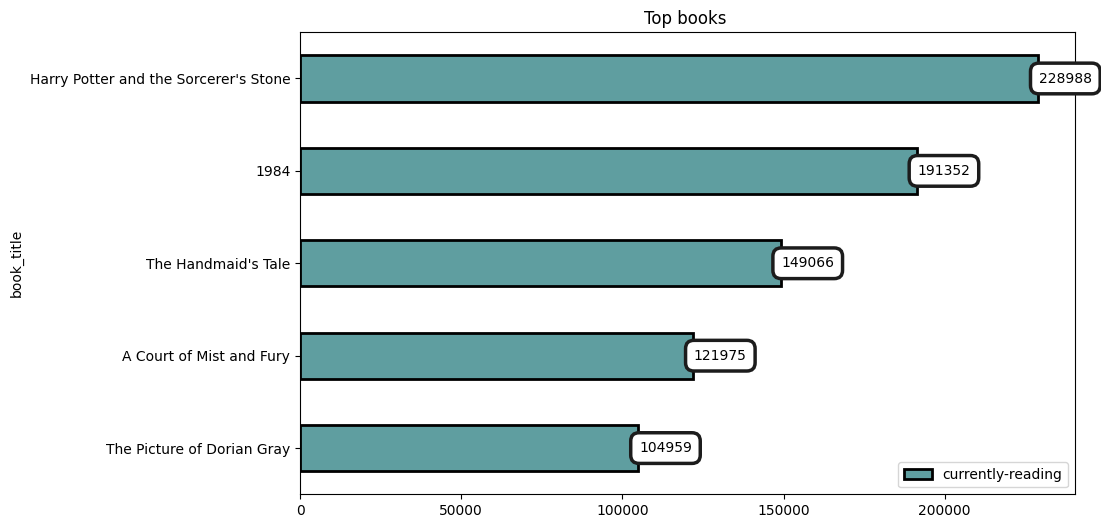

In [102]:
# Obtain top books based on currently-reading value
topbooks=pd.pivot_table(df2,index='book_title',values='currently-reading')
topbooks=topbooks.sort_values(by='currently-reading',ascending=False).head()
topbooks=topbooks.sort_values(by='currently-reading',ascending=True)
p2=topbooks.plot(kind='barh',figsize=(10,6),title='Top books ', color = 'cadetblue', edgecolor = 'black',lw=2)
p2.bar_label(p2.containers[0], label_type='edge',padding=0.5, bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
plt.show()

<Axes: title={'center': 'Rating distribution'}, xlabel='average_rating', ylabel='Count'>

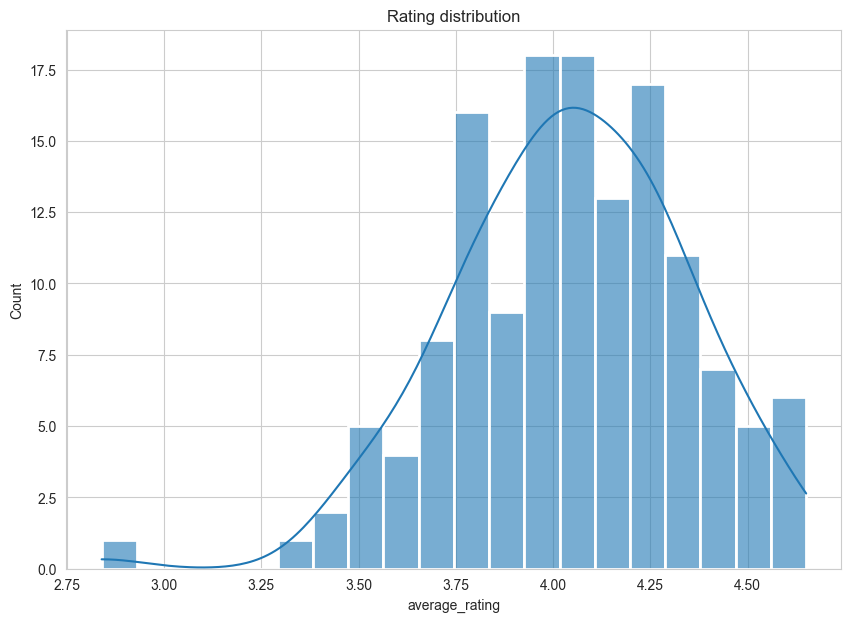

In [81]:
# Rating Distribution based on average_rating column of all_books table
plt.figure(figsize=(10,7))
plt.title('Rating distribution')
sns.histplot(df,x='average_rating',kde=True,alpha=0.6,bins=20,linewidth=2)

It appears that one of the things attempting to be banned is a good read. 🤭

<Axes: title={'center': 'Book rating and the # of Current readers'}, xlabel='average_rating', ylabel='currently-reading'>

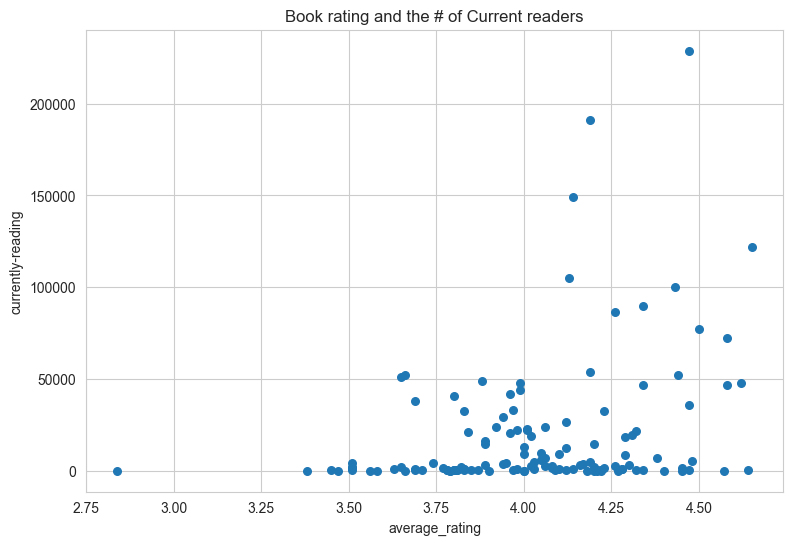

In [83]:
df2.plot(kind='scatter', x='average_rating', y='currently-reading',figsize=(9,6),s=30,title='Book rating and the # of Current readers')

You can see a slight relationship between the average rating of a title and the current readers. However, the relationships are better shown in the heatmap below.

<Axes: >

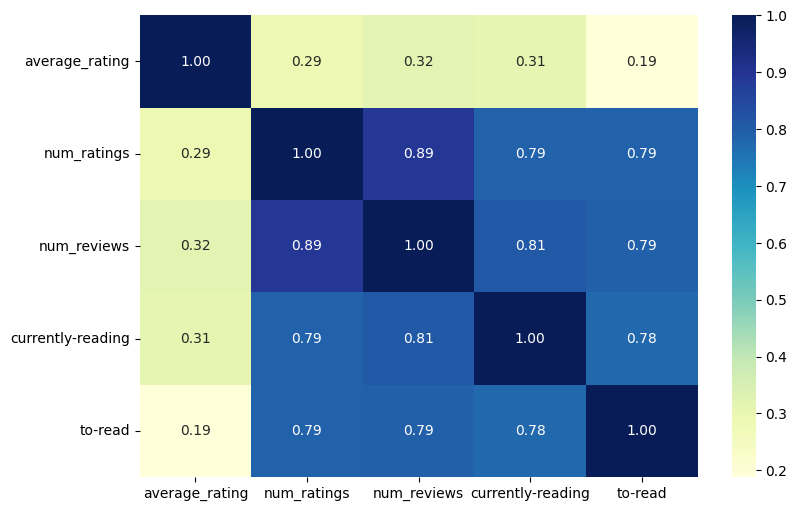

In [104]:
dfcorr=df2[['average_rating','num_ratings','num_reviews','currently-reading', 'to-read']]
plt.figure(figsize=(9,6))
sns.heatmap(dfcorr.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

Here you can see a strong relationship between the number of ratings and current readers. It appears that potential readers may care more about the popularity of a title and less about others' opinions of the title. For authors of the 'Banned Book Club', maybe all publicity is good publicity. 🤔

In [105]:
# Apply series to genres column 
genres = df['genres'].apply(pd.Series)
genres

,0,1,2,3,4,5,6
0,Graphic Novels,Comics,Fiction,Graphic Novels Comics,Fantasy,Religion,Romance
1,Romance,Fiction,Erotica,BDSM,Adult,Contemporary,Contemporary Romance
2,Fiction,Chick Lit,Young Adult,Drama,Adult,Adult Fiction,Realistic Fiction
3,Nonfiction,Memoir,True Crime,Biography,Autobiography,Crime,Audiobook
4,Nonfiction,Memoir,True Crime,Biography,Autobiography,Crime,Audiobook
...,...,...,...,...,...,...,...
136,Picture Books,Childrens,Fiction,Fantasy,Banned Books,Classics,Food
137,Graphic Novels,Nonfiction,Memoir,Comics,Biography,History,School
138,Picture Books,Childrens,Animals,Fiction,Cats,Humor,Fantasy
139,Fiction,Mystery,Thriller,Mystery Thriller,Historical Fiction,Suspense,Adventure


In [106]:
# Concat dataframes
df3 = pd.concat([df1, genres], axis=1)
df3

,book_title,author,num_pages,num_ratings,num_reviews,average_rating,0,1,2,3,4,5,6
0,Habibi,Craig Thompson,672,42085,3976,4.03,Graphic Novels,Comics,Fiction,Graphic Novels Comics,Fantasy,Religion,Romance
1,Fifty Shades of Grey,E.L. James,356,2659011,84832,3.66,Romance,Fiction,Erotica,BDSM,Adult,Contemporary,Contemporary Romance
2,My Sister’s Keeper,Jodi Picoult,423,1231031,38093,4.10,Fiction,Chick Lit,Young Adult,Drama,Adult,Adult Fiction,Realistic Fiction
3,A Stolen Life,Jaycee Dugard,273,126111,10174,3.95,Nonfiction,Memoir,True Crime,Biography,Autobiography,Crime,Audiobook
4,A Stolen Life,Jaycee Dugard,273,126102,10174,3.95,Nonfiction,Memoir,True Crime,Biography,Autobiography,Crime,Audiobook
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,In the Night Kitchen,Maurice Sendak,40,18404,997,4.00,Picture Books,Childrens,Fiction,Fantasy,Banned Books,Classics,Food
137,Persepolis: The Story of a Childhood,Marjane Satrapi,153,212336,12222,4.26,Graphic Novels,Nonfiction,Memoir,Comics,Biography,History,School
138,Skippyjon Jones,Judy Schachner,32,34633,1431,4.22,Picture Books,Childrens,Animals,Fiction,Cats,Humor,Fantasy
139,The da Vinci Code,Dan Brown,489,2380081,55573,3.92,Fiction,Mystery,Thriller,Mystery Thriller,Historical Fiction,Suspense,Adventure


In [107]:
# Export for use in Tableau
df3.to_csv('genres.csv', index=False)

In [111]:
# Mapping of specific genres to broader categories
genre_mapping = {
    'Science Fiction': 'Science Fiction', 'Fiction': 'Fiction', 'Fantasy': 'Fantasy', 'Romance': 'Romance', 'Mystery': 'Mystery', 'Historical Fiction': 'Historical', 'Literature': 'Fiction', 'Adventure': 'Adventure', 'Horror': 'Horror', 'Thriller': 'Mystery', 'Suspense': 'Mystery', 'Nonfiction': 'Nonfiction', 'Biography': 'Nonfiction', 'Memoir': 'Nonfiction', 'History': 'Nonfiction', 'Philosophy': 'Nonfiction', 'Action': 'Action', 'Crime': 'Mystery', 'Childrens': 'Childrens', 'Young Adult': 'Young Adult', 'Middle Grade': 'Young Adult', 'Juvenile': 'Childrens', 'Contemporary': 'Fiction', 'Literary Fiction': 'Fiction', 'Politics': 'Nonfiction', 'Social Justice': 'Nonfiction', 'African Literature': 'Literature', 'Magical Realism': 'Fantasy', 'India': 'Literature', 'Music': 'Nonfiction', 'Biography Memoir': 'Nonfiction', 'Rock N Roll': 'Nonfiction', 'Speculative Fiction': 'Fantasy', 'Audiobook': 'Nonfiction', 'Realistic Fiction': 'Fiction', 'High Fantasy': 'Fantasy', 'Epic Fantasy': 'Fantasy', 'Short Stories': 'Fiction', 'Mystery Thriller': 'Mystery', 'Westerns': 'Regional and Historical', 'Detective': 'Mystery', 'Psychology': 'Nonfiction', 'Self Help': 'Nonfiction', 'Mental Health': 'Nonfiction', 'Health': 'Nonfiction', 'Personal Development': 'Nonfiction', 'Magic': 'Fantasy', 'Nobel Prize': 'Nonfiction', 'Religion': 'Nonfiction', 'Russia': 'Nonfiction', 'Russian History': 'Nonfiction', 'European History': 'Nonfiction', 'War': 'Nonfiction', 'Vampires': 'Fantasy', 'Urban Fantasy': 'Fantasy', 'Ireland': 'Nonfiction', 'Irish Literature': 'Literature', 'British Literature': 'Literature', 'Sci Fi Fantasy': 'Fantasy', 'Tudor Period': 'Historical', '16th Century': 'Historical', 'Victorian': 'Historical', 'Supernatural': 'Fantasy', 'Ghosts': 'Horror', 'True Crime': 'Nonfiction', 'Autobiography': 'Nonfiction', 'Picture Books': 'Childrens', 'Dragons': 'Fantasy', 'Fairy Tales': 'Fantasy', 'Fashion': 'Nonfiction', 'Pop Culture': 'Nonfiction', 'Horses': 'Nonfiction', 'Writing': 'Nonfiction', 'Southern Gothic': 'Fiction', 'Star Wars': 'Science Fiction', 'Space Opera': 'Science Fiction',  'Coming Of Age': 'Fiction', 'Algeria': 'Nonfiction', 'France': 'Nonfiction', 'Feminism': 'Nonfiction', 'LGBT': 'Nonfiction', 'Lesbian': 'Nonfiction', 'Queer': 'Nonfiction', 'Gender': 'Nonfiction', 'China': 'Nonfiction', 'Asian Literature': 'Literature', 'School': 'Fiction', 'Australia': 'Nonfiction', 'Hard Boiled': 'Mystery', '20th Century': 'Historical', 'Animals': 'Nonfiction', 'Gothic': 'Horror', 'Drama': 'Fiction', 'Canada': 'Nonfiction', 'Jewish': 'Nonfiction', 'Canadian Literature': 'Literature', 'Indian Literature': 'Literature', 'Asia': 'Nonfiction', 'Teen': 'Young Adult', 'Dystopia': 'Science Fiction', 'Post Apocalyptic': 'Science Fiction', 'Robots': 'Science Fiction', 'Military Fiction': 'Nonfiction', 'World War II': 'Historical', 'Travel': 'Nonfiction', 'Nature': 'Nonfiction', 'Japan': 'Nonfiction', 'Essays': 'Nonfiction', 'Japanese Literature': 'Literature', 'Art': 'Fine Arts', 'Art History': 'Fine Arts', 'Design': 'Nonfiction', 'Reference': 'Nonfiction', 'Fables': 'Fiction', 'Photography': 'Nonfiction', 'Theory': 'Nonfiction', 'Poetry': 'Nonfiction', 'Time Travel': 'Science Fiction', 'African American': 'Nonfiction', 'Race': 'Nonfiction', 'International': 'Nonfiction', 'Cozy Mystery': 'Mystery', 'Chick Lit': 'Fiction', 'Contemporary Romance': 'Romance', 'Chapter Books': 'Childrens', '2nd Grade': 'Childrens', 'Anthologies': 'Fiction', 'Christianity': 'Nonfiction', 'Sexuality': 'Nonfiction', 'Aliens': 'Science Fiction', 'Boarding School': 'Fiction', 'Graphic Novels': 'Comics',
    'Adult': 'Fiction', 'Spanish Literature': 'Literature', 'Books About Books': 'Nonfiction', 'Swedish Literature': 'Literature', 'Latin American': 'Nonfiction', 'Egypt': 'Nonfiction', 'Relationships': 'Nonfiction', 'Marriage': 'Nonfiction', 'Christian': 'Nonfiction', 'Anthropology': 'Nonfiction', 'Biology': 'Nonfiction', 'Evolution': 'Nonfiction', 'Unfinished': 'Nonfiction', 'Adult Fiction': 'Fiction', 'Natural History': 'Nonfiction', 'Presidents': 'Nonfiction', 'Christmas': 'Nonfiction', 'Hugo Awards': 'Science Fiction', 'Geography': 'Nonfiction', 'Americana': 'Nonfiction',    'Geology': 'Nonfiction', 'Nigeria': 'Nonfiction', 'Noir': 'Mystery', 'Banned Books': 'Nonfiction', 'Holocaust': 'Nonfiction',
    'Germany': 'Nonfiction', 'German Literature': 'Literature', 'Horse Racing': 'Nonfiction', 'Business': 'Nonfiction', 'Leadership': 'Nonfiction', 'Management': 'Nonfiction', 'Productivity': 'Nonfiction', 'Holiday': 'Nonfiction', 'Italy': 'Nonfiction', 'Survival': 'Nonfiction', 'Polish Literature': 'Literature', 'Poland': 'Nonfiction', 'Plays': 'Drama', 'Theatre': 'Drama', 'Womens': 'Nonfiction', 'Retellings': 'Fiction', 'Communication': 'Nonfiction', 'Maps': 'Nonfiction', 'Collections': 'Fiction', 'Russian Literature': 'Literature', 'Sword and Sorcery': 'Fantasy', 'Folklore': 'Fantasy', 'Medical': 'Nonfiction', 'Architecture': 'Nonfiction', 'Journalism': 'Nonfiction', 'Criticism': 'Nonfiction',   'Arthurian': 'Fantasy', 'Mythology': 'Fantasy', 'Young Adult Fantasy': 'Young Adult', 'Kids': 'Childrens', 'Storytime': 'Childrens', 'Civil War': 'Historical', 'Comics': 'Comics', 'Com Strips': 'Comics', 'Cartoon': 'Comics', '15th Century': 'Historical', 'Plantagenet': 'Historical', 'Spirituality': 'Nonfiction', 'Taoism': 'Nonfiction', 'Conspiracy Theories': 'Nonfiction', 'Witches': 'Fantasy', 'Graphic Novels Comics': 'Comics', 'Novella': 'Fiction', 'Family': 'Fiction', 'Cultural': 'Nonfiction', 'Money': 'Nonfiction', 'Murder Mystery': 'Mystery', 'Latin American Literature': 'Literature', 'Spain': 'Nonfiction', 'Dying Earth': 'Fantasy', 'Romania': 'Nonfiction', 'Scandinavian Literature': 'Literature', 'Finnish Literature': 'Literature', 'Star Trek': 'Science Fiction', 'Media Tie In': 'Fiction', 'Star Trek Original Series': 'Science Fiction', 'Cookbooks': 'Nonfiction', 'Food and Drink': 'Nonfiction', 'Romantic Suspense': 'Romance', 'Denmark': 'Nonfiction', 'Iran': 'Nonfiction', 'Food': 'Nonfiction', 'Historical Romance': 'Romance', 'Native Americans': 'Nonfiction', 'Beauty and The Beast': 'Fantasy', 'Regency': 'Romance', 'Lebanon': 'Nonfiction', 'Brazil': 'Nonfiction', 'Portuguese Literature': 'Literature', 'Sociology': 'Nonfiction', 'Parenting': 'Nonfiction', 'Education': 'Nonfiction', 'Teaching': 'Nonfiction', 'Scotland': 'Nonfiction', '11th Century': 'Historical', 'Sports': 'Nonfiction', 'Baseball': 'Nonfiction', 'New York': 'Nonfiction', 'Werewolves': 'Fantasy', 'Pakistan': 'Nonfiction', 'Steampunk': 'Science Fiction', 'Alternate History': 'Science Fiction', 'Historical Fantasy': 'Fantasy', 'Spy Thriller': 'Mystery', 'Chess': 'Nonfiction', 'Greek Mythology': 'Fantasy', 'Cats': 'Nonfiction', 'High School': 'Young Adult', 'Read For School': 'Nonfiction', 'Psychoanalysis': 'Nonfiction', 'Sweden': 'Nonfiction', 'Modern Classics': 'Fiction', 'Turkish Literature': 'Literature', 'Turkish': 'Nonfiction', 'Weird Fiction': 'Fantasy', 'Western Romance': 'Romance', 'Witchcraft': 'Fantasy', 'Cooking': 'Nonfiction', 'Category Romance': 'Romance', 'fiction': 'Fiction', 'Crafts': 'Nonfiction', 'Literary Criticism': 'Nonfiction', 'Czech Literature': 'Literature', 'Cyberpunk': 'Science Fiction', 'French Literature': 'Literature', 'Dark': 'Fantasy', 'Heroic Fantasy': 'Fantasy', 'Dragonlance': 'Fantasy', 'Manga': 'Comics', 'Gothic Romance': 'Romance', 'Language': 'Nonfiction', 'Linguistics': 'Nonfiction', 'Dinosaurs': 'Nonfiction', 'Israel': 'Nonfiction', 'Christian Fiction': 'Fiction', 'Popular Science': 'Nonfiction', 'Quantum Mechanics': 'Nonfiction', 'Dark Fantasy': 'Fantasy', 'Portugal': 'Nonfiction', 'The United States Of America': 'Nonfiction', 'American Fiction': 'Fiction', 'Seinen': 'Comics', 'Halloween': 'Nonfiction', 'Gardening': 'Nonfiction', 'Medicine': 'Nonfiction', 'Neuroscience': 'Nonfiction', 'Womens Fiction': 'Fiction', 'Apocalyptic': 'Science Fiction', 'Roman': 'Fiction', 'Animal Fiction': 'Fiction', 'Judaism': 'Nonfiction', 'Regency Romance': 'Romance', 'Ancient History': 'Historical', 'Ancient': 'Historical', 'Culinary': 'Nonfiction', 'New Weird': 'Fantasy', 'Paranormal Romance': 'Romance', 'Science Fiction Romance': 'Science Fiction', 'Love': 'Romance', 'Legal Thriller': 'Mystery', 'Batman': 'Comics', 'Comic Book': 'Comics', 'Dc Comics': 'Comics', 'Atheism': 'Nonfiction', 'World History': 'Nonfiction', '19th Century': 'Historical', 'Dogs': 'Nonfiction', 'Film': 'Nonfiction', 'Cult Classics': 'Fiction', 'Shojo': 'Comics', 'Inspirational': 'Nonfiction', 'Transport': 'Nonfiction', 'Stories': 'Fiction', 'American Civil War': 'Historical', 'Military History': 'Nonfiction', 'Ghost Stories': 'Horror', 'Pirates': 'Adventure', 'Economics': 'Nonfiction', 'Government': 'Nonfiction', 'Environment': 'Nonfiction', 'Class': 'Nonfiction', 'Epic': 'Fantasy', 'Fae': 'Fantasy', '1st Grade': 'Childrens', 'Hungary': 'Nonfiction', 'Hungarian Literature': 'Literature', 'Military Science Fiction': 'Science Fiction', 'Book Club': 'Fiction', 'Gender Studies': 'Nonfiction', 'Lds Fiction': 'Fiction', 'Lds': 'Nonfiction', 'Musicals': 'Nonfiction', 'Female Authors': 'Nonfiction', 'Academic': 'Nonfiction', 'College': 'Nonfiction', 'Chinese Literature': 'Literature', 'Post Colonial': 'Nonfiction', 'Faith': 'Nonfiction', 'Theology': 'Nonfiction', 'Football': 'Nonfiction', 'Mountaineering': 'Nonfiction', 'Zimbabwe': 'Nonfiction', 'Forgotten Realms': 'Fantasy', 'Dungeons and Dragons': 'Fantasy', '18th Century': 'Historical', 'Harem': 'Romance', 'Disability': 'Nonfiction', 'Finance': 'Nonfiction', 'Counting': 'Childrens', 'Mathematics': 'Nonfiction', 'French Revolution': 'Historical', 'Psychological Thriller': 'Mystery', 'Art': 'Fine Arts', 'galiza': 'Nonfiction', 'hespaña': 'Nonfiction', 'Mental Illness': 'Nonfiction', 'Archaeology': 'Nonfiction', 'Buddhism': 'Nonfiction', 'Futuristic': 'Science Fiction', 'Harlequin': 'Romance', 'Political Science': 'Nonfiction', 'Buisness': 'Nonfiction', 'Art Design': 'Fine Arts', 'Church': 'Nonfiction', 'Death': 'Nonfiction', 'World War I': 'Historical', 'Medieval Romance': 'Romance', 'M F Romance': 'Romance', 'Travelogue': 'Nonfiction', 'Abuse': 'Nonfiction', 'Medieval History': 'Historical', 'Ecology': 'Nonfiction', 'Sustainability': 'Nonfiction', 'Climate Change': 'Nonfiction', 'Romanovs': 'Nonfiction', 'Modern': 'Nonfiction', 'Danish': 'Nonfiction', 'Herbs': 'Nonfiction', 'Nordic Noir': 'Mystery', 'Christian Living': 'Nonfiction', 'Greece': 'Nonfiction', 'Comic Fantasy': 'Fantasy', 'Skepticism': 'Nonfiction', 'Angels': 'Fantasy', 'Law': 'Nonfiction', 'Sports Romance': 'Romance', 'Technology': 'Nonfiction', 'Academia': 'Nonfiction', '12th Century': 'Historical', 'M M Romance': 'Romance', '17th Century': 'Historical', 'Back To School': 'Fiction', 'Gay': 'LGBT', 'American Revolution': 'Historical', 'Ukraine': 'Nonfiction', 'Semiotics': 'Nonfiction', 'Botswana': 'Nonfiction', 'Rwanda': 'Nonfiction', 'Police': 'Mystery', 'How To': 'Nonfiction', 'Cities': 'Nonfiction', 'Society': 'Nonfiction', 'Computer Science': 'Nonfiction', 'Microhistory': 'Nonfiction', 'Food History': 'Nonfiction', 'Disease': 'Nonfiction', 'Home Economics': 'Nonfiction', 'Fairy Tale Retellings': 'Fantasy', 'Amish': 'Nonfiction', 'Poverty': 'Nonfiction', 'Erotica': 'Romance', 'Foodie': 'Nonfiction', 'Autistic Spectrum Disorder': 'Nonfiction', 'Railways': 'Nonfiction', 'Adoption': 'Nonfiction', 'Mermaids': 'Fantasy', 'Singularity': 'Science Fiction', 'Cults': 'Nonfiction', 'Growth Mindset': 'Nonfiction', 'Bangladesh': 'Nonfiction', 'Fairies': 'Fantasy', 'Food Writing': 'Nonfiction', 'Shapeshifters': 'Fantasy', '21st Century': 'Fiction', 'Zombies': 'Horror', 'Nutrition': 'Nonfiction', 'Fantasy Romance': 'Romance', 'Terrorism': 'Nonfiction', 'Sudan': 'Nonfiction', 'Amazon': 'Nonfiction', 'Demons': 'Fantasy', 'New Adult': 'Romance', 'Ethiopia': 'Nonfiction', 'Road Trip': 'Fiction', 'Young Adult Contemporary': 'Young Adult', 'Polygamy': 'Romance', 'BDSM': 'Romance', 'Erotic Romance': 'Romance', 'Love Story': 'Romance', 'Fighters': 'Romance', 'Motorcycle': 'Romance', 'Musicians': 'Nonfiction', 'Menage': 'Romance', 'New Adult Romance': 'Romance', 'M M F': 'Romance', 'European Literature': 'Literature', 'Google': 'Nonfiction', 'Gay For You': 'LGBT', 'Soldiers': 'Nonfiction', 'Hockey': 'Nonfiction', 'Military Romance': 'Romance', 'Racing': 'Nonfiction', 'M M Contemporary': 'Romance', 'Superheroes': 'Comics', 'Young Adult Romance': 'Young Adult', 'Bulgaria': 'Nonfiction', 'Young Adult Science Fiction': 'Young Adult', 'Reverse Harem': 'Romance', 'Anti Racist': 'Nonfiction', 'Christian Non Fiction': 'Nonfiction', 'Transgender': 'LGBT', 'Basketball': 'Nonfiction', 'Historical' :'Historical', 'Science Fiction Fantasy':'Science Fiction', 'Paranormal':'Science Fiction', 'Comedy':'Comedy', 'Humor':'Comedy', 'Classics':'Classics', 'Science':'Science', 'Space':'Science', 'Physics':'Science', 'Espionage':'Mystery', 'Novels':'Comics', 'Astronomy':'Science', 'Prehistoric':'Historical', 'Italian Literature':'Literature', 'Historical Mystery':'Historical', 'American':'Regional and Historical', 'Medieval':'Historical', 'Southern':'Regional and Historical', 'Africa':'Regional and Historical', 'American History':'Regional and Historical', 'South Africa':'Regional and Historical', 'art':'Fine Arts'
}


In [112]:
# df['genres'] = df['genres'].apply(eval)
result_df = df.explode('genres')

In [113]:
# Apply the mapping to create a new 'Category' column
result_df['Category'] = result_df['genres'].map(genre_mapping)
result_df['Category'] = result_df['Category'].str.lower()
result_df['Category'].value_counts()

Category
fiction                    264
nonfiction                 256
young adult                120
childrens                   65
comics                      51
classics                    46
fantasy                     46
historical                  32
science fiction             29
romance                     26
mystery                     11
adventure                   11
comedy                      10
horror                       5
lgbt                         3
science                      3
regional and historical      2
literature                   1
Name: count, dtype: int64

In [114]:
result_df.isnull().sum()
result_df = result_df.dropna(subset=['Category'])

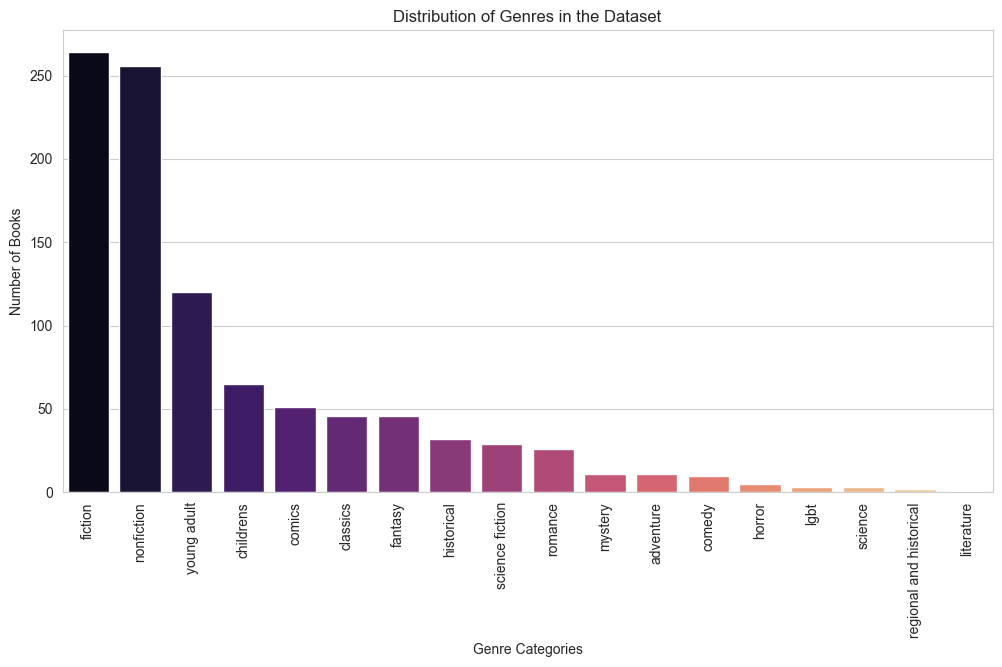

In [116]:
# Distribution of Genres in Dataset
sns.set_style('whitegrid')
genre_category_count = result_df['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plot = sns.barplot(x=genre_category_count.index, y=genre_category_count.values,palette='magma',
                   order=genre_category_count.index, )
plot.set_title('Distribution of Genres in the Dataset')
plot.set_xlabel('Genre Categories')
plot.set_ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

In [117]:
# Import table from sql database as dataframe
query = 'SELECT * FROM mapped_bans_final'
mb = pd.read_sql(sql=query, con=conn)

# Preview dataframe
mb.head()

,ID,author,title,challenge_type,challenge_init,initial_response,challenge_notes,decision,restrictions,restriction_details,...,NM_CBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCH_YR
0,10026,"Hopkins, Ellen",Tricks,Internal/Administrative Review,Administration,Off Shelves,Response to 1069 per district,Banned/Removed,None,None,...,"Naples-Marco Island, FL",1,163,"Cape Coral-Fort Myers-Naples, FL",N,N,1225,12080,12028,2022-2023
1,10039,"Johnson, George M.",All Boys Arent Blue,Internal/Administrative Review,Administration,Off Shelves,Response to 1069 per district,Retained/Restricted,Yes,Parent Permisison Required,...,"Naples-Marco Island, FL",1,163,"Cape Coral-Fort Myers-Naples, FL",N,N,1225,12080,12028,2022-2023
2,10109,"McCormick, Patricia",Sold,Internal/Administrative Review,Administration,Off Shelves,Response to 1069 per district,Banned/Removed,None,None,...,"Naples-Marco Island, FL",1,163,"Cape Coral-Fort Myers-Naples, FL",N,N,1225,12080,12028,2022-2023
3,10128,"Morrison, Toni",The Bluest Eye,Internal/Administrative Review,Administration,Off Shelves,Response to 1069 per district,Banned/Removed,None,None,...,"Naples-Marco Island, FL",1,163,"Cape Coral-Fort Myers-Naples, FL",N,N,1225,12080,12028,2022-2023
4,10251,"Chbosky, Stephen",The Perks of Being a Wallflower,Formal,Affiliation Unknown,Off Shelves,"""Pornographic""",Banned/Removed,None,None,...,"Deltona-Daytona Beach-Ormond Beach, FL",1,422,"Orlando-Lakeland-Deltona, FL",N,N,1206,12026,12007,2022-2023


In [118]:
num_vars = mb.columns[mb.dtypes != 'object']
cat_vars = mb.columns[mb.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['ID', 'month', 'year', 'alt_id', 'year_1', 'NCESSCH', 'LEAID',
       'OPSTFIPS', 'ZIP_NM', 'STFIP', 'CNTY_NM', 'LOCALE', 'lat', 'lon',
       'CBSATYPE', 'CD'],
      dtype='object')
Index(['author', 'title', 'challenge_type', 'challenge_init',
       'initial_response', 'challenge_notes', 'decision', 'restrictions',
       'restriction_details', 'library_type', 'state', 'agency', 'city',
       'county', 'school', 'library', 'police', 'book_status', 'title_1',
       'author_1', 'reasons', 'NAME', 'STREET', 'CTY_NM', 'ST_NM', 'NM_CNTY',
       'CBSA', 'NM_CBSA', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'SLDL', 'SLDU',
       'SCH_YR'],
      dtype='object')


In [119]:
mb = mb.dropna(subset=['lat', 'lon'])

In [20]:
dfg = mb.groupby(['lat','lon']).agg(lambda x: list(x)).reset_index()
dfg

,lat,lon,ID,author,title,challenge_type,challenge_init,initial_response,challenge_notes,decision,...,NM_CBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCH_YR
0,24.994139,-80.536921,[16744],"[Curato, Mike]",[Flamer],[Unclear],[Administration],[Unknown],[None],[Banned/Removed],...,"[Key West, FL]",[2],[370],"[Miami-Port St. Lucie-Fort Lauderdale, FL]",[N],[N],[1226],[12120],[12039],[2022-2023]
1,26.320000,-80.094700,"[3287, 5377]","[Evison, Jonathan, Morrison, Toni]","[Lawn Boy, The Bluest Eye]","[None, None]","[Affiliation Unknown, Affiliation Unknown]","[Unknown, Unknown]","[Restricted to HS only, None]","[Retained/Restricted, Retained/Restricted]",...,"[Miami-Fort Lauderdale-Pompano Beach, FL, Miam...","[1, 1]","[370, 370]","[Miami-Port St. Lucie-Fort Lauderdale, FL, Mia...","[N, N]","[N, N]","[1222, 1222]","[12093, 12093]","[12034, 12034]","[2022-2023, 2022-2023]"
2,26.424900,-81.426500,"[10026, 10039, 10109, 10128, 1405, 3305, 3538,...","[Hopkins, Ellen, Johnson, George M., McCormick...","[Tricks, All Boys Arent Blue, Sold, The Bluest...","[Internal/Administrative Review, Internal/Admi...","[Administration, Administration, Administratio...","[Off Shelves, Off Shelves, Off Shelves, Off Sh...","[Response to 1069 per district, Response to 10...","[Banned/Removed, Retained/Restricted, Banned/R...",...,"[Naples-Marco Island, FL, Naples-Marco Island,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[163, 163, 163, 163, 163, 163, 163, 163, 163, ...","[Cape Coral-Fort Myers-Naples, FL, Cape Coral-...","[N, N, N, N, N, N, N, N, N, N, N, N]","[N, N, N, N, N, N, N, N, N, N, N, N]","[1225, 1225, 1225, 1225, 1225, 1225, 1225, 122...","[12080, 12080, 12080, 12080, 12080, 12080, 120...","[12028, 12028, 12028, 12028, 12028, 12028, 120...","[2022-2023, 2022-2023, 2022-2023, 2022-2023, 2..."
3,26.695400,-81.914700,"[5261, 5421]","[Alexie, Sherman, Morrison, Toni]",[The Absolutely True Diary of a Part-Time Indi...,"[Unclear, Unclear]","[Affiliation Unknown, Affiliation Unknown]","[Unknown, Unknown]",[Received info from FCA - also formed ADHOC co...,"[Retained Restricted, Retained Restricted]",...,"[Cape Coral-Fort Myers, FL, Cape Coral-Fort My...","[1, 1]","[163, 163]","[Cape Coral-Fort Myers-Naples, FL, Cape Coral-...","[N, N]","[N, N]","[1219, 1219]","[12079, 12079]","[12027, 12027]","[2022-2023, 2022-2023]"
4,27.135600,-82.426400,[5432],"[Morrison, Toni]",[The Bluest Eye],[Internal/Administrative Review],[Administration],[Unknown],[None],[Unknown],...,"[North Port-Sarasota-Bradenton, FL]",[1],[412],"[North Port-Sarasota, FL]",[N],[N],[1217],[12074],[12023],[2022-2023]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,47.757993,-116.775110,[3289],"[Evison, Jonathan]",[Lawn Boy],[Targeted During Board Meeting],[Affiliation Unknown],[On shelves],[challenged due to LGBTQ content and obsenity],[Unknown],...,"[Coeur d'Alene, ID]",[1],[518],"[Spokane-Spokane Valley-Coeur d'Alene, WA-ID]",[N],[N],[1601],[16002],[16002],[2022-2023]
296,48.119717,-118.203028,[6553],"[Dawson, Juno]",[This Book is Gay],[None],[Affiliation Unknown],[Unknown],[None],[Unknown],...,"[Spokane-Spokane Valley, WA]",[1],[518],"[Spokane-Spokane Valley-Coeur d'Alene, WA-ID]",[N],[N],[5305],[53007],[53007],[2022-2023]
297,48.171325,-103.659070,"[126, 1380, 3516, 3693, 6138]","[Maas, Sarah J., Hopkins, Ellen, Green, John, ...","[A Court of Mist and Fury, Crank, Looking for ...","[None, None, None, None, None]","[Affiliation Unknown, Affiliation Unknown, Aff...","[Off Shelves, Off Shelves, Off Shelves, Off Sh...",[In end (12/2023) board followed recommendatio...,"[Retained/Restricted, Unknown, Retained, Retai...",...,"[Williston, ND, Williston, ND, Williston, ND, ...","[2, 2, 2, 2, 2]","[N, N, N, N, N]","[N, N, N, N, N]","[N, N, N, N, N]","[N, N, N, N, N]","[3800, 3800, 3800, 3800, 3800]","[38002, 38002, 38002, 38002, 38002]","[38002, 38002, 38002, 38002, 38002]","[2022-2023, 2022-2023, 2022-2023, 2022-2023, 2..."
298,55.355289,-131.682718,

In [120]:
# Group by location, combine columns title and reasons
mbx = mb.groupby(['lat', 'lon']).apply(lambda x: [list(x['NAME']), list(zip(x['title'],x['reasons']))]).apply(pd.Series).reset_index()
mbx.columns = ['lat','lon','school', 'bans']

In [137]:
# Determine the average location of all schools
map_center = [mb['lat'].mean(), mb['lon'].mean()]

# Create a map using the avg location of all schools
map = folium.Map(location=map_center, zoom_start=4)

# radius = int(mb[['lat', 'lon']].value_counts() [(row['lat'], row['lon'])]/2)

for idx, row in mbx.iterrows():
    html = ('SCHOOL: {} BANS: {}'.format(row['school'][0], row['bans']))
    iframe = folium.IFrame(html=html, width=300, height=250)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker([row['lat'], row['lon']],
                        radius = 5,
                        # radius=row['LAT'] / df['LON'].max() * 20, # Example scaling
                        popup=popup,
                        fill_color='darkgreen',
                        color='darkgreen',
                        fill_opacity=0.6).add_to(map)
map